import library

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use(['seaborn'])
sns.set(font_scale=1.5)

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

df_train = pd.read_csv('./input/train.csv')
df_test = pd.read_csv('./input/test.csv')
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다

df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

In [106]:
df_train = pd.read_csv('./input/train.csv')
df_test = pd.read_csv('./input/test.csv')

In [107]:
df_train.head()
# feature : Pclass, Sex, Age, SibSp, Parch, Fare, Embarked
# target label : Survived

# not useful data : PassengerId, Name, Ticket, Cabin 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [108]:
# check columns data
df_train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [109]:
for col in df_train.columns:
    msg = 'column: {:10}\t Percent of NaN value: {:.2f}%'.format(
        col, 
        100*(df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column: Survived  	 Percent of NaN value: 0.00%
column: Pclass    	 Percent of NaN value: 0.00%
column: Name      	 Percent of NaN value: 0.00%
column: Sex       	 Percent of NaN value: 0.00%
column: Age       	 Percent of NaN value: 19.87%
column: SibSp     	 Percent of NaN value: 0.00%
column: Parch     	 Percent of NaN value: 0.00%
column: Ticket    	 Percent of NaN value: 0.00%
column: Fare      	 Percent of NaN value: 0.00%
column: Cabin     	 Percent of NaN value: 77.10%
column: Embarked  	 Percent of NaN value: 0.22%


In [110]:
for col in df_test.columns:
    msg = 'column: {:10}\t Percent of NaN value: {:.2f}%'.format(
        col, 
        100*(df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column: Pclass    	 Percent of NaN value: 0.00%
column: Name      	 Percent of NaN value: 0.00%
column: Sex       	 Percent of NaN value: 0.00%
column: Age       	 Percent of NaN value: 20.57%
column: SibSp     	 Percent of NaN value: 0.00%
column: Parch     	 Percent of NaN value: 0.00%
column: Ticket    	 Percent of NaN value: 0.00%
column: Fare      	 Percent of NaN value: 0.24%
column: Cabin     	 Percent of NaN value: 78.23%
column: Embarked  	 Percent of NaN value: 0.00%


<AxesSubplot:xlabel='Survived', ylabel='count'>

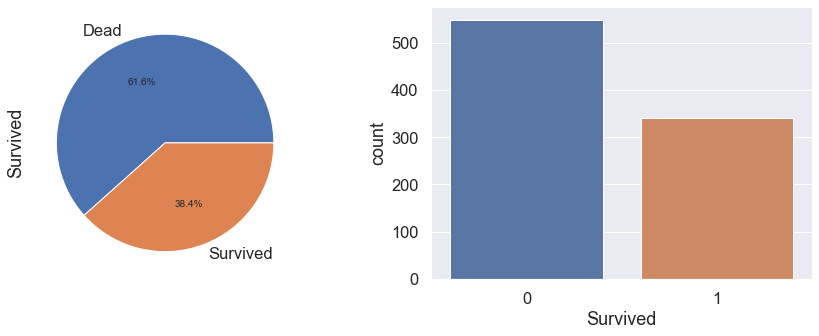

In [111]:
# check Target Label
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

labels = ['Dead', 'Survived']
df_train['Survived'].value_counts().plot.pie(ax=ax[0], autopct='%.1f%%', labels=labels)

sns.countplot(x='Survived', data=df_train)

In [112]:
# EDA (Exploratory Data Analysis)
# Pclass
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).count()

,Pclass,Survived
0,1,216
1,2,184
2,3,491


In [113]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).sum()

,Pclass,Survived
0,1,136
1,2,87
2,3,119


<AxesSubplot:xlabel='Pclass'>

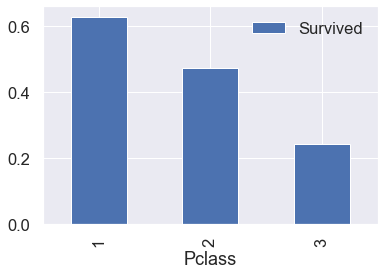

In [114]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().plot.bar()

<AxesSubplot:title={'center':'Pclass: Survived vs Dead'}, xlabel='Pclass', ylabel='count'>

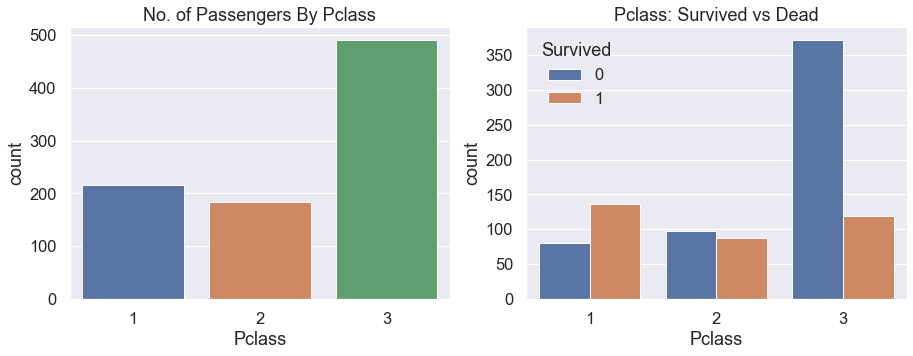

In [115]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].set_title('No. of Passengers By Pclass')
sns.countplot(x='Pclass', data=df_train, ax=ax[0])

ax[1].set_title('Pclass: Survived vs Dead')
sns.countplot(x='Pclass', hue='Survived', data=df_train, ax=ax[1])

<AxesSubplot:title={'center':'Sex: Survived vs Dead'}, xlabel='Sex', ylabel='count'>

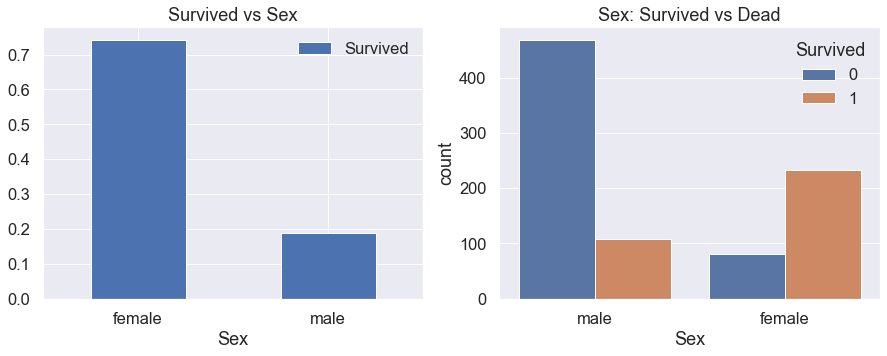

In [116]:
# Sex
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].set_title('Survived vs Sex')
df_train[['Sex', 'Survived']].groupby('Sex').mean().plot.bar(ax=ax[0], rot=0)

ax[1].set_title('Sex: Survived vs Dead')
sns.countplot(x='Sex', hue='Survived', data=df_train, ax=ax[1])

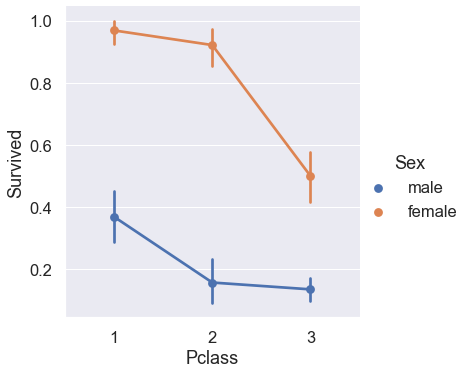

In [117]:
# Both Sex and Pclass with Survived
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train)

In [118]:
# Age
print('제일 나이가 많은 승객 : {:.1f} Years'.format(df_train.Age.max()))
print('제일 나이가 어린 승객 : {:.1f} Years'.format(df_train.Age.min()))
print('승객 평균 나이 : {:.1f} Years'.format(df_train.Age.mean()))

제일 나이가 많은 승객 : 80.0 Years
제일 나이가 어린 승객 : 0.4 Years
승객 평균 나이 : 29.7 Years


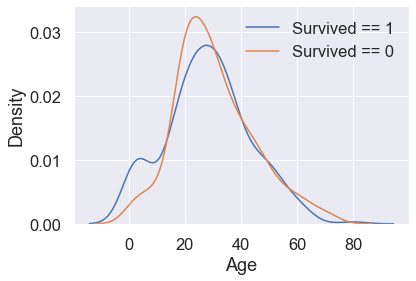

In [119]:
# 생존에 따른 Age Histogram
sns.kdeplot(df_train[df_train.Survived == 1].Age)
sns.kdeplot(df_train[df_train.Survived == 0].Age)
plt.legend(['Survived == 1', 'Survived == 0'])

Text(0.5, 0, 'Age')

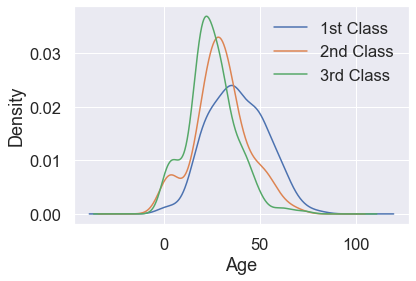

In [120]:
# Age distribution within classes
df_train.Age[df_train.Pclass == 1].plot(kind='kde')
df_train.Age[df_train.Pclass == 2].plot(kind='kde')
df_train.Age[df_train.Pclass == 3].plot(kind='kde')
plt.legend(['1st Class', '2nd Class', '3rd Class'])
plt.xlabel('Age')

Text(0.5, 0, 'Range of Age(0~x)')

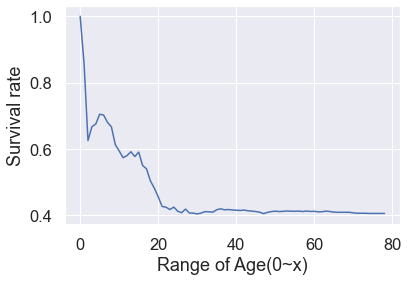

In [121]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(
        df_train[df_train.Age < i].Survived.sum() / len(df_train[df_train.Age < i].Survived))

plt.plot(cummulate_survival_ratio)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')

<AxesSubplot:xlabel='Sex', ylabel='Age'>

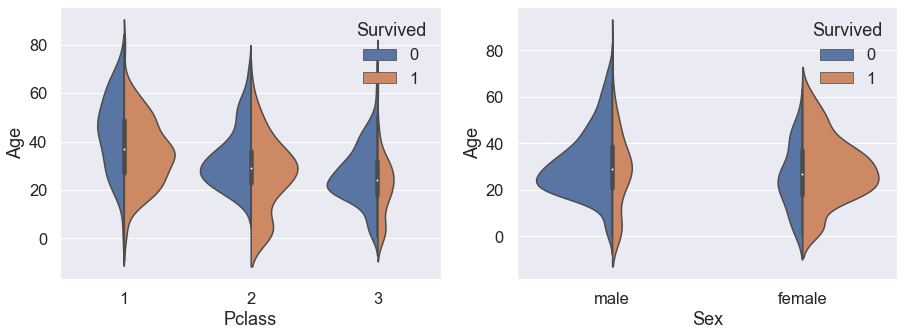

In [122]:
# Pclass, Sex, Age
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.violinplot(x='Pclass', y='Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[0])
sns.violinplot(x='Sex', y='Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[1])

In [123]:
# Embarked
df_train[['Embarked', 'Survived']].groupby(['Embarked']).count()

,Survived
Embarked,
C,168
Q,77
S,644


In [124]:
df_train[['Embarked', 'Survived']].groupby(['Embarked']).sum()

,Survived
Embarked,
C,93
Q,30
S,217


In [125]:
df_train[['Embarked', 'Survived']].groupby(['Embarked']).mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


<AxesSubplot:xlabel='Embarked'>

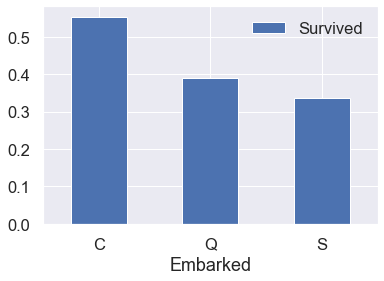

In [126]:
df_train[['Embarked', 'Survived']].groupby(['Embarked']).mean().plot.bar(rot=0)

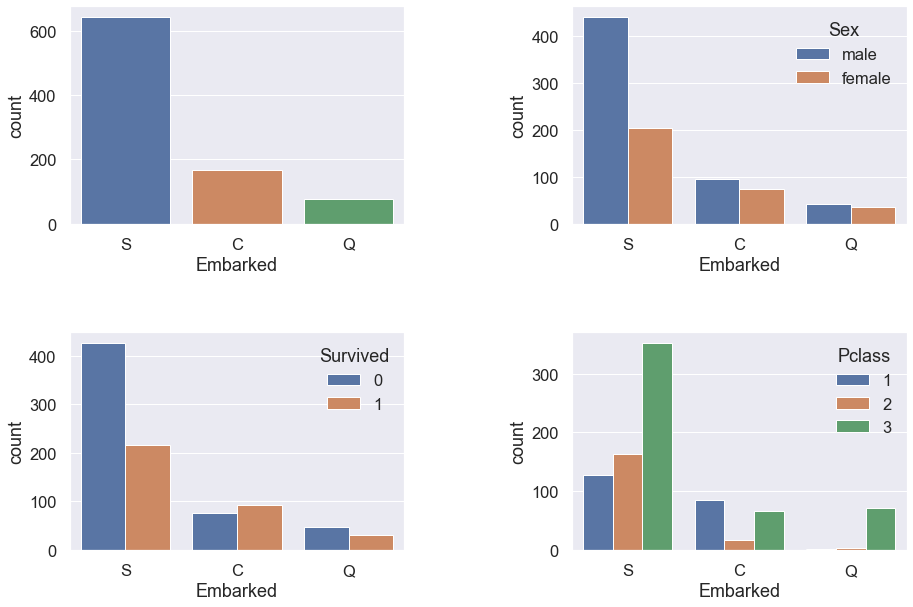

In [127]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

sns.countplot(x='Embarked', data=df_train, ax=ax[0, 0])
sns.countplot(x='Embarked', hue='Sex', data=df_train, ax=ax[0, 1])
sns.countplot(x='Embarked', hue='Survived', data=df_train, ax=ax[1, 0])
sns.countplot(x='Embarked', hue='Pclass', data=df_train, ax=ax[1, 1])

plt.subplots_adjust(wspace=0.5, hspace=0.5)

In [133]:
df_train['FamilySize'] = df_train.SibSp + df_train.Parch + 1
df_test['FamilySize'] = df_test.SibSp + df_test.Parch + 1

In [134]:
print('Maximum size of Family:', df_train.FamilySize.max())
print('Minimum size of Family:', df_train.FamilySize.min())
print('Mean size of Family:', round(df_train.FamilySize.mean()))

Maximum size of Family: 11
Minimum size of Family: 1
Mean size of Family: 2


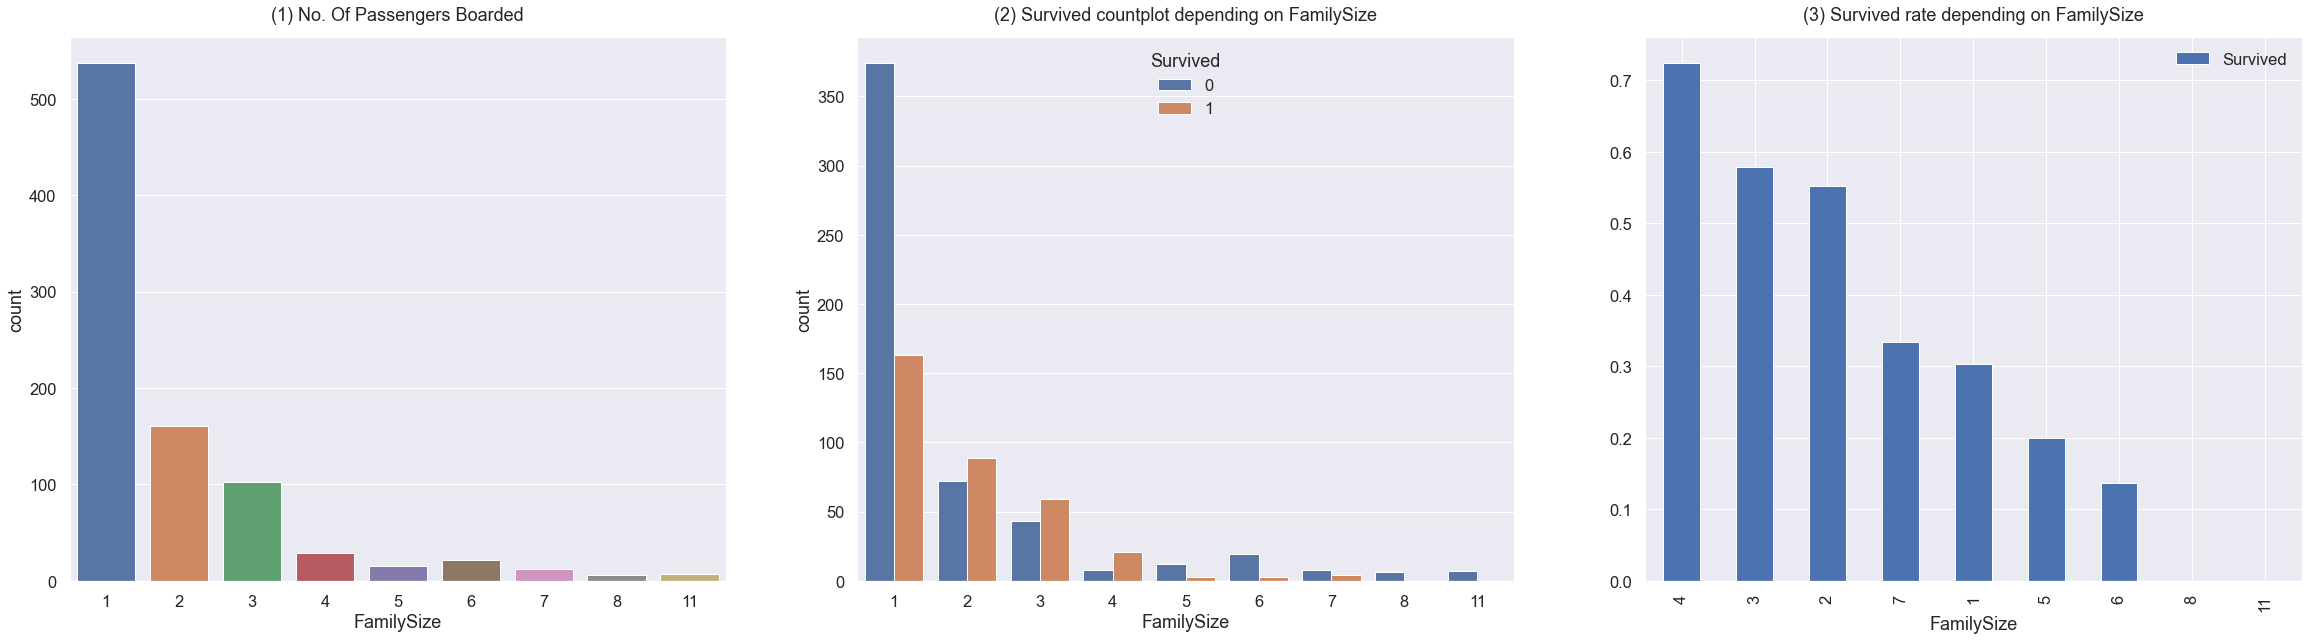

In [135]:
f,ax=plt.subplots(1, 3, figsize=(40,10))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',  y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [138]:
# Fare
df_train.Fare.head(10)

0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
5     8.4583
6    51.8625
7    21.0750
8    11.1333
9    30.0708
Name: Fare, dtype: float64

<AxesSubplot:xlabel='Fare', ylabel='Density'>

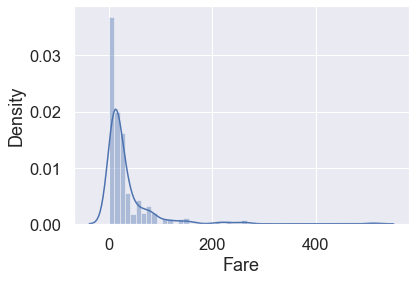

In [141]:
sns.distplot(df_train.Fare)

In [142]:
df_train.Fare = df_train.Fare.map(lambda i: np.log(i) if i > 0 else 0)
df_test.Fare = df_test.Fare.map(lambda i: np.log(i) if i > 0 else 0)

<AxesSubplot:xlabel='Fare', ylabel='Density'>

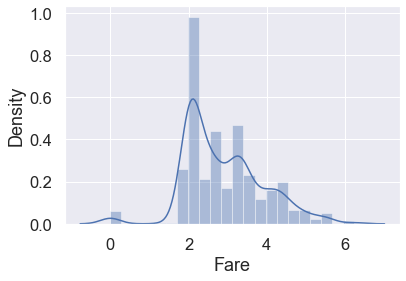

In [143]:
sns.distplot(df_train.Fare)

In [145]:
# Cabin
df_train.Cabin.isnull().sum()

687

In [170]:
# Feature Engineering
# Fill null in Age using title
df_train['Initial'] = df_train.Name.str.extract('([A-Za-z]+)\.')
df_test['Initial'] = df_test.Name.str.extract('([A-Za-z]+)\.')

In [171]:
df_train.Initial.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Mme           1
Capt          1
Lady          1
Don           1
Sir           1
Ms            1
Jonkheer      1
Countess      1
Name: Initial, dtype: int64

In [172]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady',
                             'Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs',
                         'Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady',
                            'Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs'
                         ,'Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [173]:
df_train.groupby(['Initial']).mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


<AxesSubplot:xlabel='Initial'>

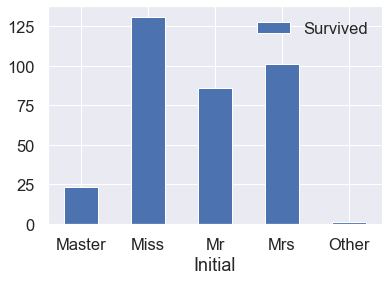

In [178]:
df_train[['Initial', 'Survived']].groupby('Initial').sum().plot.bar(rot=0)

In [179]:
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age'] = 33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age'] = 36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age'] = 5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age'] = 22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age'] = 46

df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mr'),'Age'] = 33
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mrs'),'Age'] = 36
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Master'),'Age'] = 5
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Miss'),'Age'] = 22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Other'),'Age'] = 46

In [180]:
# Fill null in Embarked
print('Embarked has', df_train.Embarked.isnull().sum(), 'null values')

Embarked has 2 null values


In [181]:
df_train.Embarked.fillna('S', inplace=True)

In [186]:
# Change Age (continuous to categorical)
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    elif x < 80:
        return 7
    else:
        return 8
    
df_train['Age_cat'] = df_train.Age.apply(category_age)
df_test['Age_cat'] = df_test.Age.apply(category_age)

In [185]:
df_train.Age_cat.value_counts()

3    304
2    256
1    102
4     89
0     66
5     48
6     19
7      6
8      1
Name: Age_cat, dtype: int64

In [187]:
# drop Age column
df_train.drop('Age', axis=1, inplace=True)
df_test.drop('Age', axis=1, inplace=True)

In [188]:
# Change Initial, Embarked and Sex (String to Numerical)
df_train['Initial'] = df_train.Initial.map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Other':4})
df_test['Initial'] = df_test.Initial.map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Other':4})

In [191]:
df_train['Embarked'] = df_train.Embarked.map({'C':0,'Q':1,'S':2})
df_test['Embarked'] = df_test.Embarked.map({'C':0,'Q':1,'S':2})

In [192]:
df_train['Sex'] = df_train.Sex.map({'female':0,'male':1})
df_test['Sex'] = df_test.Sex.map({'female':0,'male':1})

In [193]:
df_train.Initial.isnull().any()

False

In [194]:
df_train.Embarked.isnull().any()

False

In [195]:
df_train.Sex.isnull().sum()

0

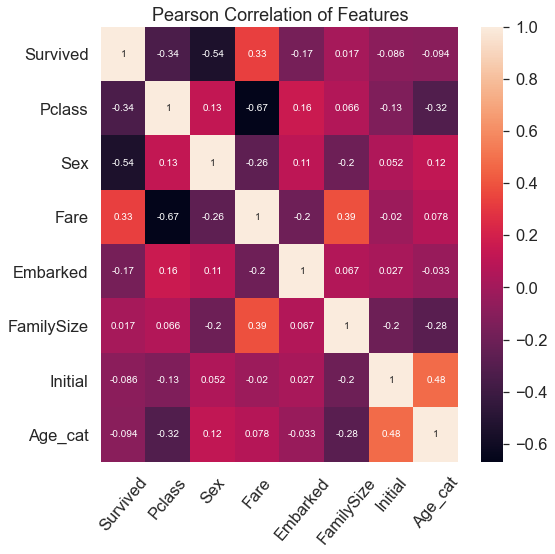

In [205]:
# Pearson Correlation Heatmap
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 
                         'Embarked', 'FamilySize', 'Initial', 'Age_cat']]

plt.figure(figsize=(8,8))
plt.title('Pearson Correlation of Features')
sns.heatmap(heatmap_data.astype(float).corr(), annot=True)
plt.xticks(rotation=50)

del heatmap_data

In [206]:
# one-hot encoding on Initial and Embarked
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')

In [207]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,2,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0,2,3,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,2,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,2,3,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,2,1,3,0,0,1,0,0


In [208]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

In [209]:
# drop columns
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [219]:
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,1,3,0,0,1,0,0,0,0,1


In [211]:
# Building Machine learning model and prediction using the trained model
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [212]:
# Split dataset into train, valid, test set
X_train = df_train.drop('Survived', axis=1).values
target_label = df_train['Survived'].values
X_test = df_test.values

In [213]:
X_tr, X_vld, y_tr, y_vld = train_test_split(
    X_train, target_label, test_size=0.3, random_state=2020)

In [225]:
# Model generation and prediction
model = RandomForestClassifier()
model.fit(X_tr, y_tr)
prediction = model.predict(X_vld)

In [226]:
print('total {} people, {:.2f}% accuracy'.format(y_vld.shape[0], 
                                                 100*metrics.accuracy_score(prediction, y_vld)))

total 268 people, 81.34% accuracy


In [227]:
from pandas import Series

feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=df_test.columns)

<AxesSubplot:>

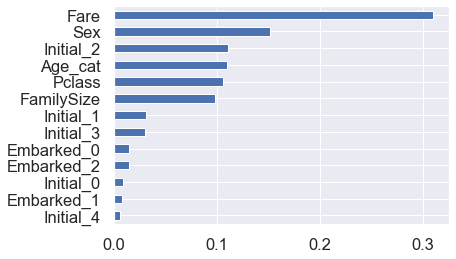

In [228]:
Series_feat_imp.sort_values().plot.barh()

In [230]:
submission = pd.read_csv('./input/gender_submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [231]:
prediction = model.predict(X_test)
submission['Survived'] = prediction

In [232]:
submission.to_csv('./my_third_submission.csv', index=False)